# Выбор инициативной модели для дальнейшего упрощения LMEM   
full LMEM vs Linear regression

In [1]:
import mne
import os.path as op
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import copy
import pandas as pd
import statsmodels.stats.multitest as mul

In [2]:
# in order to create Evoked from MEM data (regression coeff and p_value), 
#which we need for topomaps plotti ng we need .info attribute, which we can take from donor
donor = mne.Evoked("/home/vera/MNE/MEM_regression/MEM_old_right_baseline/030_koal_comb_planar_act1_st.fif")

    Found the data of interest:
        t =       0.00 ...    6746.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 27 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.


/home/vera/anaconda3/lib/python3.8/site-packages/mne/io/tag.py:348: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return str(d.tostring().decode('latin1', 'ignore'))
/home/vera/anaconda3/lib/python3.8/site-packages/mne/io/tag.py:348: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return str(d.tostring().decode('latin1', 'ignore'))
/home/vera/anaconda3/lib/python3.8/site-packages/mne/io/tag.py:348: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return str(d.tostring().decode('latin1', 'ignore'))
/home/vera/anaconda3/lib/python3.8/site-packages/mne/io/tag.py:427: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  ch_name = ch_name[:np.argmax(ch_name == b'')].tostring()
/home/vera/anaconda3/lib/python3.8/site-packages/mne/io/tag.py:427: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  ch_name = ch_name[:np.argmax(ch_name == b'')].tostring()
/home/vera/anaconda3/lib/python3.8/

In [3]:
sensors = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/sensors.csv')
sensors.head()

,Unnamed: 0,Name
0,0,MEG0112
1,1,MEG0122
2,2,MEG0132
3,3,MEG0142
4,4,MEG0212


# Probing

In [3]:
# read data, which were obtained by full LMEM (reg coef and p_value for each combined planar - 102)
# 1 - 3 full LMEM
df1 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/table_for_search_significant_sensor/active1_st_PreM_full_LMEM.csv')
df2 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/table_for_search_significant_sensor/active1_st_M_full_LMEM.csv')
df3 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/table_for_search_significant_sensor/active1_st_PostM_full_LMEM.csv')

# 4-6 LR
df4 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/table_for_search_significant_sensor/active1_st_PreM_lin_reg.csv')
df5 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/table_for_search_significant_sensor/active1_st_M_lin_reg.csv')
df6 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/table_for_search_significant_sensor/active1_st_PostM_lin_reg.csv')

In [4]:
df1['Sensors_name'] = sensors['Name']
df2['Sensors_name'] = sensors['Name']
df3['Sensors_name'] = sensors['Name']
df4['Sensors_name'] = sensors['Name']
df5['Sensors_name'] = sensors['Name']
df6['Sensors_name'] = sensors['Name']

# Full LMEM

In [5]:
# PreM
a = df1.sort_values(by=['p_val'])
a.head()

,reg_coeff,p_val,Sensors_name
18,0.069826,0.046614,MEG0532
4,0.071894,0.080745,MEG0212
53,0.064005,0.081773,MEG1442
20,0.047297,0.089800,MEG0612
19,0.061331,0.101340,MEG0542


In [6]:
# M
b = df2.sort_values(by=['p_val'])
b.head()

,reg_coeff,p_val,Sensors_name
5,-0.066475,0.039458,MEG0222
77,-0.086478,0.070923,MEG2042
89,-0.092093,0.091231,MEG2342
61,-0.058692,0.103202,MEG1642
50,0.049073,0.115418,MEG1412


In [7]:
# PostM
c = df3.sort_values(by=['p_val'])
c.head()

,reg_coeff,p_val,Sensors_name
60,-0.148743,0.000010,MEG1632
77,-0.166694,0.000023,MEG2042
61,-0.137980,0.000026,MEG1642
70,-0.138204,0.000107,MEG1912
80,-0.112863,0.000308,MEG2132


# LR

In [8]:
# PreM
d = df4.sort_values(by=['p_val'])a = df1.sort_values(by=['p_val'])
d.head()

,reg_coeff,p_val,Sensors_name
84,-0.110773,0.000701,MEG2232
2,0.084463,0.002446,MEG0132
69,-0.094448,0.002931,MEG1842
82,-0.086551,0.008656,MEG2212
75,-0.084978,0.014824,MEG2022


In [9]:
# M
e = df5.sort_values(by=['p_val'])
e.head()

,reg_coeff,p_val,Sensors_name
5,-0.128751,0.000007,MEG0222
77,-0.141013,0.000186,MEG2042
69,-0.121562,0.000299,MEG1842
12,-0.116215,0.000348,MEG0412
82,-0.116139,0.000580,MEG2212


In [10]:
# PostM
f = df6.sort_values(by=['p_val'])
f.head()

,reg_coeff,p_val,Sensors_name
90,-0.169542,1.268933e-08,MEG2412
93,-0.181143,1.435436e-08,MEG2442
55,-0.154411,4.324488e-08,MEG1522
60,-0.169308,9.682514e-08,MEG1632
58,-0.153404,1.195354e-07,MEG1612


# Targeted 

In [5]:
# read data, which were obtained by full LMEM (reg coef and p_value for each combined planar - 102)
# 7 - 9 full LMEM
df7 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/table_for_search_significant_sensor/active2_end_PreM_full_LMEM.csv')
df8 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/table_for_search_significant_sensor/active2_end_M_full_LMEM.csv')
df9 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/table_for_search_significant_sensor/active2_end_PostM_full_LMEM.csv')

# 10-12 LR
df10 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/table_for_search_significant_sensor/active2_end_PreM_lin_reg.csv')
df11 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/table_for_search_significant_sensor/active2_end_M_lin_reg.csv')
df12 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/table_for_search_significant_sensor/active2_end_PostM_lin_reg.csv')

df7['Sensors_name'] = sensors['Name']
df8['Sensors_name'] = sensors['Name']
df9['Sensors_name'] = sensors['Name']
df10['Sensors_name'] = sensors['Name']
df11['Sensors_name'] = sensors['Name']
df12['Sensors_name'] = sensors['Name']

# Full LMEM

In [6]:
# PreM
g = df7.sort_values(by=['p_val'])
g.head()

,reg_coeff,p_val,Sensors_name
74,-0.156108,0.007848,MEG2012
69,-0.200333,0.015308,MEG1842
70,-0.139370,0.036190,MEG1912
66,-0.174431,0.054490,MEG1812
82,-0.202656,0.060565,MEG2212


In [7]:
# M
h = df8.sort_values(by=['p_val'])
h.head()

,reg_coeff,p_val,Sensors_name
19,0.140250,0.004634,MEG0542
10,0.166601,0.022376,MEG0332
100,0.113864,0.027682,MEG2632
23,0.156325,0.033422,MEG0642
21,0.120186,0.038151,MEG0622


In [8]:
# PostM
i = df9.sort_values(by=['p_val'])
i.head()

,reg_coeff,p_val,Sensors_name
16,0.117974,0.008547,MEG0512
17,0.106822,0.011315,MEG0522
19,0.166538,0.012489,MEG0542
12,0.199369,0.012675,MEG0412
10,0.235426,0.015361,MEG0332


# LR

In [10]:
# PreM
j = df10.sort_values(by=['p_val'])
j.head()

,reg_coeff,p_val,Sensors_name
69,-0.217443,0.000214,MEG1842
66,-0.190636,0.001069,MEG1812
74,-0.177324,0.004358,MEG2012
85,-0.164873,0.004507,MEG2242
75,-0.174392,0.005236,MEG2022


In [11]:
# M
k = df11.sort_values(by=['p_val'])
k.head()

,reg_coeff,p_val,Sensors_name
100,0.121202,0.005576,MEG2632
99,0.092386,0.018087,MEG2622
101,0.102092,0.048465,MEG2642
33,0.082898,0.048548,MEG0942
96,0.092005,0.050966,MEG2532


In [12]:
# PostM
l = df12.sort_values(by=['p_val'])
l.head()3

,reg_coeff,p_val,Sensors_name
10,0.201960,0.000059,MEG0332
73,0.287308,0.000060,MEG1942
24,0.228072,0.000112,MEG0712
79,0.235169,0.000144,MEG2122
72,0.242909,0.000144,MEG1932


# LMEM только с интерсептами

In [10]:
# read data, which were obtained by full LMEM (reg coef and p_value for each combined planar - 102)
# 13 - 15 LMEM intercept Probing
df13 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/tables_for_topomaps/active1_st_PreM_by_LMEM_intercept.csv')
df14 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/tables_for_topomaps/active1_st_M_by_LMEM_intercept.csv')
df15 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/tables_for_topomaps/active1_st_PostM_by_LMEM_intercept.csv')

# 16 - 18 LMEM intercept Targeted
df16 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/tables_for_topomaps/active2_end_PreM_by_LMEM_intercept.csv')
df17 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/tables_for_topomaps/active2_end_M_by_LMEM_intercept.csv')
df18 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/tables_for_topomaps/active2_end_PostM_by_LMEM_intercept.csv')

In [15]:
df13['Sensors_name'] = sensors['Name']
df14['Sensors_name'] = sensors['Name']
df15['Sensors_name'] = sensors['Name']
df16['Sensors_name'] = sensors['Name']
df17['Sensors_name'] = sensors['Name']
df18['Sensors_name'] = sensors['Name']

In [16]:
# probing PreM
m = df13.sort_values(by=['p_val'])
print('Probing, PreM')
m.head()

Probing, PreM


,reg_coeff,p_val,Sensors_name
2,0.101727,0.000303,MEG0132
4,0.085821,0.001262,MEG0212
51,0.078579,0.003526,MEG1422
59,0.082219,0.003787,MEG1622
11,0.073750,0.004442,MEG0342


In [17]:
# probing M
n = df14.sort_values(by=['p_val'])
print('Probing, M')
n.head()

Probing, M


,reg_coeff,p_val,Sensors_name
5,-0.068363,0.008017,MEG0222
77,-0.083273,0.022837,MEG2042
89,-0.086390,0.034283,MEG2342
61,-0.061340,0.054322,MEG1642
87,-0.073524,0.062973,MEG2322


In [18]:
# probing PostMLMEM, которую оптимизировали на сенсоре, выбранном с помощью LR

o = df15.sort_values(by=['p_val'])
print('Probing, PostM')
o.head()

Probing, PostM


,reg_coeff,p_val,Sensors_name
55,-0.148920,9.242420e-08,MEG1522
75,-0.199283,1.598944e-07,MEG2022
93,-0.162673,3.742174e-07,MEG2442
90,-0.151802,3.846580e-07,MEG2412
60,-0.156357,8.427859e-07,MEG1632


In [21]:
# targrted PreM
p = df16.sort_values(by=['p_val'])
print('Targeted, PreM')
p.head()

Targeted, PreM


,reg_coeff,p_val,Sensors_name
69,-0.185450,0.000127,MEG1842
82,-0.190421,0.000382,MEG2212
66,-0.167144,0.000865,MEG1812
68,-0.156844,0.001062,MEG1832
84,-0.171747,0.002011,MEG2232


In [19]:
# targrted M
q = df17.sort_values(by=['p_val'])
print('Targeted, M')
q.head()

Targeted, M


,reg_coeff,p_val,Sensors_name
8,0.149051,0.001387,MEG0312
10,0.157711,0.003405,MEG0332
19,0.139302,0.003768,MEG0542
9,0.151919,0.003931,MEG0322
23,0.135377,0.005693,MEG0642


In [20]:
# targrted PostM
r = df18.sort_values(by=['p_val'])
print('Targeted, PostM')
r.head()

Targeted, PostM


,reg_coeff,p_val,Sensors_name
10,0.230873,0.000011,MEG0332
60,0.252738,0.000045,MEG1632
24,0.231456,0.000078,MEG0712
19,0.167862,0.000303,MEG0542
23,0.182656,0.000350,MEG0642


# LMEM, которую оптимизировали на сенсоре, выбранном с помощью LR

In [3]:
# read data, which were obtained by full LMEM (reg coef and p_value for each combined planar - 102)
# 19 - 21 LMEM intercept Probing
df19 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/tables_for_topomaps/active1_st_PreM_by_LR.csv')
df20 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/tables_for_topomaps/active1_st_M_by_LR.csv')
df21 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/tables_for_topomaps/active1_st_PostM_by_LR.csv')

# 22 - 24 LMEM intercept Targeted
df22 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/tables_for_topomaps/active2_end_PreM_by_LR.csv')
df23 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_b
df24 = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/tables_for_topomaps/active2_end_PostM_by_LR.csv')

In [6]:
df19['Sensors_name'] = sensors['Name']
df20['Sensors_name'] = sensors['Name']
df21['Sensors_name'] = sensors['Name']
df22['Sensors_name'] = sensors['Name']
df23['Sensors_name'] = sensors['Name']
df24['Sensors_name'] = sensors['Name']

In [7]:
# probing PreM
s = df19.sort_values(by=['p_val'])
print('Probing, PreM')
s.head()

Probing, PreM


,reg_coeff,p_val,Sensors_name
2,0.101727,0.000303,MEG0132
4,0.085821,0.001262,MEG0212
51,0.078579,0.003526,MEG1422
59,0.082219,0.003787,MEG1622
11,0.073750,0.004442,MEG0342


In [8]:
# probing M
t = df20.sort_values(by=['p_val'])
print('Probing, M')
t.head()

Probing, M


,reg_coeff,p_val,Sensors_name
77,-0.123765,0.000755,MEG2042
89,-0.129038,0.001651,MEG2342
87,-0.114584,0.003885,MEG2322
74,-0.094013,0.006038,MEG2012
78,-0.099489,0.008085,MEG2112


In [9]:
# probing PostM
u = df21.sort_values(by=['p_val'])
print('Probing, PostM')
u.head()

Probing, PostM


,reg_coeff,p_val,Sensors_name
55,-0.148920,9.242420e-08,MEG1522
75,-0.199283,1.598944e-07,MEG2022
93,-0.162673,3.742174e-07,MEG2442
90,-0.151802,3.846580e-07,MEG2412
60,-0.156357,8.427859e-07,MEG1632


In [10]:
# Targeted PreM
v = df22.sort_values(by=['p_val'])
print('Targeted, PreM')
v.head()

Targeted, PreM


,reg_coeff,p_val,Sensors_name
69,-0.185450,0.000127,MEG1842
68,-0.156844,0.001062,MEG1832
85,-0.157363,0.001576,MEG2242
75,-0.170228,0.002391,MEG2022
84,-0.160878,0.002885,MEG2232


In [11]:
# Targeted PreM
w = df23.sort_values(by=['p_val'])
print('Targeted, M')
w.head()

Targeted, M


,reg_coeff,p_val,Sensors_name
100,0.114533,0.008298,MEG2632
9,0.132709,0.009727,MEG0322
8,0.116224,0.009993,MEG0312
99,0.098707,0.011015,MEG2622
33,0.097782,0.015440,MEG0942


In [12]:
# Targeted PreM
x = df24.sort_values(by=['p_val'])
print('Targeted, PostM')
x.head()

Targeted, PostM


,reg_coeff,p_val,Sensors_name
10,0.230873,0.000011,MEG0332
60,0.252738,0.000045,MEG1632
24,0.231456,0.000078,MEG0712
19,0.167862,0.000303,MEG0542
23,0.182656,0.000350,MEG0642


# Topomaps

In [4]:
# function make False/True array from p_value array, we need this for mask parametr in topomap
def p_val_binary(p_val, treshold):
    #p_val =  copy.deepcopy(p_vdf.sort_values(by=['p_val'])al_n)
    for raw in range(p_val.shape[0]):
        for collumn in range(p_val.shape[1]):
            if p_val[raw, collumn] < treshold:
                p_val[raw, collumn] = 1#make Evoked
            else:
                p_val[raw, collumn] = 0
    return p_val

In [5]:
 # space FDR for each time point independently
def space_fdr(p_val_n):
    print(p_val_n.shape)
    temp = copy.deepcopy(p_val_n)
    for i in range(temp.shape[1]):
        _, temp[:,i] = mul.fdrcorrection(p_val_n[:,i])
    return temp

# Full FDR -the correction is made once for the intire data array
def full_fdr(p_val_n):
    s = p_val_n.shape
    print(p_val_n.shape)
    pval = np.ravel(p_val_n)
    _, pval_fdr = mul.fdrcorrection(pval)
    pval_fdr_shape = pval_fdr.reshape(s)
    return pval_fdr_shape

# Common function for topomams plotting

In [6]:
def topomaps_for_mem(session, interval, donor, method):
    df = pd.read_csv('/home/vera/MNE/MEM_regression/MEM_old_right_baseline/tables_for_topomaps/{0}_{1}_{2}.csv'.format(session, interval, method))
    reg_coeff = np.array(df['reg_coeff']).reshape(102,1)
    p_val = np.array(df['p_val']).reshape(102,1)
    space_fdr_pval = space_fdr(p_val)
    full_fdr_pval = full_fdr(p_val)
    
    binary = p_val_binary(p_val, 0.05)
    binary_space_fdr = p_val_binary(space_fdr_pval, 0.05)
    binary_full_fdr = p_val_binary(full_fdr_pval, 0.05)
    t = np.linspace(0, 0, num=1)
    r = mne.EvokedArray(reg_coeff, donor.info)
    fig = r.plot_topomap(times = t, ch_type='planar1', scalings = 1, units = 'reg coef', 
                              colorbar = True, mask = np.bool_(binary), 
                             mask_params = dict(marker='o', markerfacecolor='white', markeredgecolor='k', linewidth=0, markersize=10, markeredgewidth=2));
    '''
    fig1 = r.plot_topomap(times = t, ch_type='planar1', scalings = 1, units = 'reg coef', 
                              colorbar = True, mask = np.bool_(binary_space_fdr), 
                             mask_params = dict(marker='o', markerfacecolor='yellow', markeredgecolor='k', linewidth=0, markersize=10, markeredgewidth=2));
    
    '''
    fig2 = r.plot_topomap(times = t, ch_type='planar1', scalings = 1, units = 'reg coef', 
                              colorbar = True, mask = np.bool_(binary_full_fdr), 
                             mask_params = dict(marker='o', markerfacecolor='yellow', markeredgecolor='k', linewidth=0, markersize=10, markeredgewidth=2));
    
    return(fig, fig2)



# LR

active1_st PreM
(102, 1)
(102, 1)


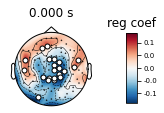

active1_st M
(102, 1)
(102, 1)


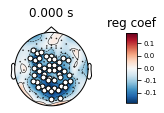

active1_st PostM
(102, 1)
(102, 1)


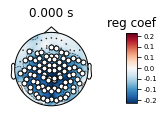

active2_end PreM
(102, 1)
(102, 1)


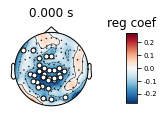

active2_end M
(102, 1)
(102, 1)


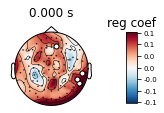

active2_end PostM
(102, 1)
(102, 1)


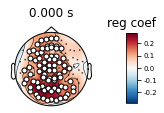

In [18]:
# plot topomaps for every condinions
intervals = ['PreM', 'M', 'PostM']
sessions = ['active1_st', 'active2_end']


for session in sessions:
    for j in intervals:
        print('{0} {1}'.format(session, j))
        fig = topomaps_for_mem(session = session, interval = j, donor = donor)
        #fig.savefig('/home/vtretyakova/Desktop/corr_with_behavior/MEM_old/topomaps/{0}_{1}.jpeg'.format(session, j), dpi = 300);
        #fig1.savefig('/home/vtretyakova/Desktop/corr_with_behavior/MEM_old/topomaps/{0}_{1}_space_fdr.jpeg'.format(session, j), dpi = 300);
        #fig2.savefig('/home/vtretyakova/Desktop/corr_with_behavior/MEM_old/topomaps/{0}_{1}_full_fdr.jpeg'.format(session, j), dpi = 300);

# LMEM

active1_st PreM
(102, 1)
(102, 1)


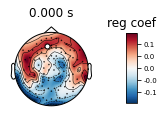

active1_st M
(102, 1)
(102, 1)


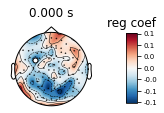

active1_st PostM
(102, 1)
(102, 1)


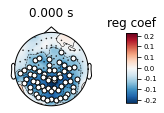

active2_end PreM
(102, 1)
(102, 1)


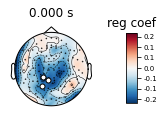

active2_end M
(102, 1)
(102, 1)


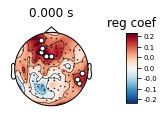

active2_end PostM
(102, 1)
(102, 1)


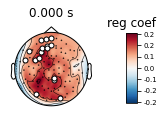

In [20]:
# plot topomaps for every condinions
intervals = ['PreM', 'M', 'PostM']
sessions = ['active1_st', 'active2_end']


for session in sessions:
    for j in intervals:
        print('{0} {1}'.format(session, j))
        fig = topomaps_for_mem(session = session, interval = j, donor = donor)
        #fig.savefig('/home/vtretyakova/Desktop/corr_with_behavior/MEM_old/topomaps/{0}_{1}.jpeg'.format(session, j), dpi = 300);
        #fig1.savefig('/home/vtretyakova/Desktop/corr_with_behavior/MEM_old/topomaps/{0}_{1}_space_fdr.jpeg'.format(session, j), dpi = 300);
        #fig2.savefig('/home/vtretyakova/Desktop/corr_with_behavior/MEM_old/topomaps/{0}_{1}_full_fdr.jpeg'.format(session, j), dpi = 300);

# Стороим topomaps по моделям, полученным путем упрощения full LMEM на сенсоре с наименьшим значением p - value, полученным двумя способами

# 1. С помощью LR

active1_st PreM
(102, 1)
(102, 1)


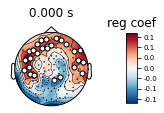

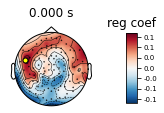

active1_st M
(102, 1)
(102, 1)


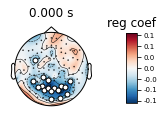

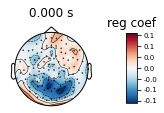

active1_st PostM
(102, 1)
(102, 1)


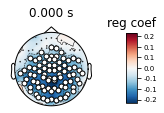

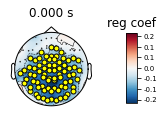

active2_end PreM
(102, 1)
(102, 1)


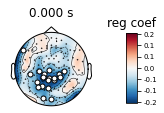

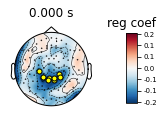

active2_end M
(102, 1)
(102, 1)


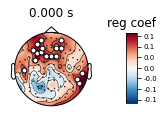

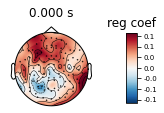

active2_end PostM
(102, 1)
(102, 1)


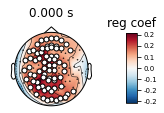

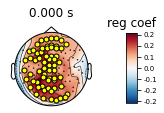

In [9]:
method = 'by_LR'
# plot topomaps for every condinions
intervals = ['PreM', 'M', 'PostM']
sessions = ['active1_st', 'active2_end']


for session in sessions:
    for j in intervals:
        print('{0} {1}'.format(session, j))
        fig, fig2 = topomaps_for_mem(session = session, interval = j, donor = donor, method = method )
        #fig.savefig('/home/vtretyakova/Desktop/corr_with_behavior/MEM_old/topomaps/{0}_{1}.jpeg'.format(session, j), dpi = 300);
        #fig1.savefig('/home/vtretyakova/Desktop/corr_with_behavior/MEM_old/topomaps/{0}_{1}_space_fdr.jpeg'.format(session, j), dpi = 300);
        #fig2.savefig('/home/vtretyakova/Desktop/corr_with_behavior/MEM_old/topomaps/{0}_{1}_full_fdr.jpeg'.format(session, j), dpi = 300);

# 2. С помощью LMEM

active1_st PreM
(102, 1)
(102, 1)


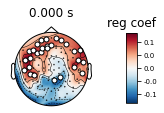

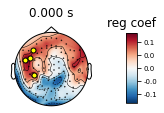

active1_st M
(102, 1)
(102, 1)


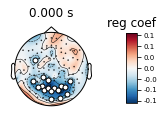

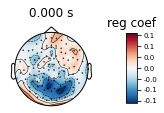

active1_st PostM
(102, 1)
(102, 1)


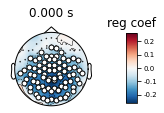

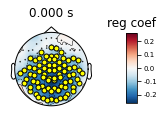

active2_end PreM
(102, 1)
(102, 1)


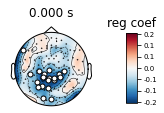

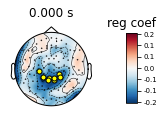

active2_end M
(102, 1)
(102, 1)


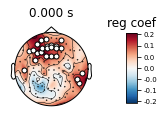

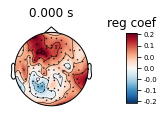

active2_end PostM
(102, 1)
(102, 1)


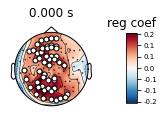

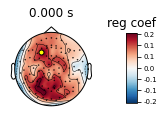

In [8]:
method = 'by_LMEM'
# plot topomaps for every condinions
intervals = ['PreM', 'M', 'PostM']
sessions = ['active1_st', 'active2_end']


for session in sessions:
    for j in intervals:
        print('{0} {1}'.format(session, j))
        fig, fig2 = topomaps_for_mem(session = session, interval = j, donor = donor, method = method )
        #fig.savefig('/home/vtretyakova/Desktop/corr_with_behavior/MEM_old/topomaps/{0}_{1}.jpeg'.format(session, j), dpi = 300);
        #fig1.savefig('/home/vtretyakova/Desktop/corr_with_behavior/MEM_old/topomaps/{0}_{1}_space_fdr.jpeg'.format(session, j), dpi = 300);
        #fig2.savefig('/home/vtretyakova/Desktop/corr_with_behavior/MEM_old/topomaps/{0}_{1}_full_fdr.jpeg'.format(session, j), dpi = 300);

# 3. Построение topomaps с помощью LMEM, которая использует только интерсепты, без предварительного упрощения

active1_st PreM
(102, 1)
(102, 1)


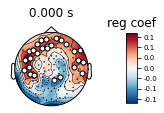

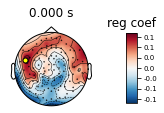

active1_st M
(102, 1)
(102, 1)


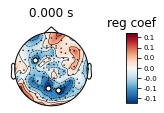

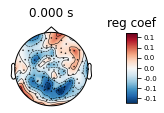

active1_st PostM
(102, 1)
(102, 1)


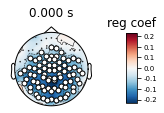

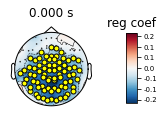

active2_end PreM
(102, 1)
(102, 1)


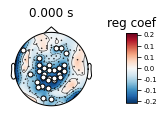

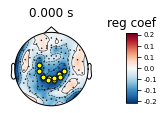

active2_end M
(102, 1)
(102, 1)


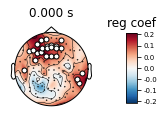

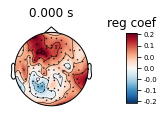

active2_end PostM
(102, 1)
(102, 1)


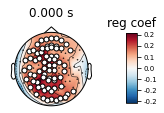

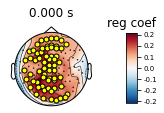

In [7]:
method = 'by_LMEM_intercept'
# plot topomaps for every condinions
intervals = ['PreM', 'M', 'PostM']
sessions = ['active1_st', 'active2_end'] 


for session in sessions:
    for j in intervals:
        print('{0} {1}'.format(session, j))
        fig, fig2 = topomaps_for_mem(session = session, interval = j, donor = donor, method = method )
        #fig.savefig('/home/vtretyakova/Desktop/corr_with_behavior/MEM_old/topomaps/{0}_{1}.jpeg'.format(session, j), dpi = 300);
        #fig1.savefig('/home/vtretyakova/Desktop/corr_with_behavior/MEM_old/topomaps/{0}_{1}_space_fdr.jpeg'.format(session, j), dpi = 300);
        #fig2.savefig('/home/vtretyakova/Desktop/corr_with_behavior/MEM_old/topomaps/{0}_{1}_full_fdr.jpeg'.format(session, j), dpi = 300);